# Linear Regression

Suppose we want to fit a line of best fit through the following points

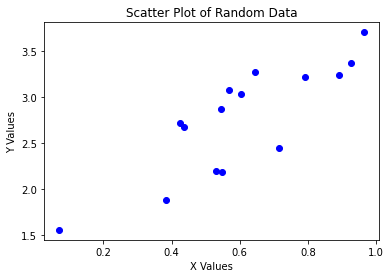

In [3]:
# Generate random x and y values
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)  # Setting seed for reproducibility
x = np.random.rand(15)  # Generate 5 random x values between 0 and 1
y = 2*x + 1 + np.random.rand(15)  # Generate 5 random y values between 0 and 1 and add to the line y = 2x + 1.
# Note that because we know how y has been generated we will expect the coefficients of the line of 
# best fit to be approximately 2 and 1.

# Create a scatter plot
plt.scatter(x, y, color='b', marker='o')

# Add labels and a legend
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Scatter Plot of Random Data')

# Display the plot
plt.show()


The line of best fit will be in the form $y = \beta_1 x + \beta_0$.

We will use gradient descent to find the best values of $\beta_1$ and $\beta_0$ that MINIMISES the residuals.

Residuals are the vertical differences between the data points and the line - they represent the errors that would be made if predicting the y-coordinate using the regression line.

In [4]:
# This function calculates the difference between a predicted value of y (using the current guess for the equation of the line)
# and the actual y coordinate for each point.
# We would like to minimise the total of all these differences, but some will be positive and some negative.
# One solution to this is to square the differences before totalling.
# This gives rise to the Ordinary Least Squares (OLS) method, though there are other ways of tackling this problem.

def squared_residuals(y_pred, y_actual):
    # The Loss Function
    return np.sum((y_pred - y_actual)**2)

# As we try different values for beta_1 and beta_0 we will calculate the predicted y coordinate
# and then use the gradient of the total of the squared residuals to adjust beta_1 and beta_0 until it's minimised.

def calculate_y_pred(x, b1, b0):
    return b1*x + b0

In [5]:
# As in the first gradient descent example we'll initialise the learning rate and number of iterations
# However, in this example we've set beta_1 and beta_0 to be zero initially (rather than random values)

b1 = 0.0
b0 = 0.0
L = 0.001
iterations = 100_000

In [6]:
# We'll begin by calculating the total of the squared residuals 
# for the initial values of b1 and b0:
y_pred = calculate_y_pred(x, b1, b0)

loss = squared_residuals(y_pred, y)
loss

119.82460536468395

We will now use this to adjust b1 and b0 using the gradient of the loss function (which in this case is the squared residuals). To do this we will need to partially differentiate with respect to $\beta_1$ and $\beta_0$ seperately. And notice we will also need to use Chain Rule.

$SR = (y_{pred} - y_{actual})^2$

Substituting $y = \beta_1 x + \beta_0$ we get:

$SR = (\beta_1 x + \beta_0 - y_{actual})^2$

We can now differentiate SR partially with respect to $\beta_1$ and then $\beta_0$ using Chain rule:

$\frac{\partial SR}{\partial \beta_1} = 2(\beta_1 x +\beta_0 - y_{actual})x$

and

$\frac{\partial SR}{\partial \beta_0} = 2(\beta_1 x +\beta_0 - y_{actual})$

Now that we no longer need to see where the $\beta$'s are to differentiate we can simplify to:

$\frac{\partial SR}{\partial \beta_1} = 2(y_{pred} - y_{actual})x$

and

$\frac{\partial SR}{\partial \beta_0} = 2(y_{pred} - y_{actual})$


In [7]:
# Now adjust b1 and b0:

b1 -= L*np.sum(2*(y_pred - y)*x)

b0 -= L*np.sum(2*(y_pred - y))

print('After one iteration the coefficients have changed from zero to:',b1,'and',b0)

After one iteration the coefficients have changed from zero to: 0.053336176478438545 and 0.08295313979480397


In [8]:
# The more iterations (repeats) of this process we do the closer we will get to the best equation for the line of best fit
# Remember that because we generated y values using the equation y = 2x + 1 with some random noise 
# we expect to get and answer close to this

for count in range(iterations):
    y_pred = calculate_y_pred(x, b1, b0)
    slope = squared_residuals(y_pred, y)
    b1 -= L*np.sum(2*(y_pred - y)*x)
    b0 -= L*np.sum(2*(y_pred - y))
    
# and at the end we can see the equation we have reached
print(f'y = {b1}x + {b0}')

y = 2.156495686868057x + 1.4650310370766957
